In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
dataset.shape

(7613, 5)

In [5]:
print(dataset["target"].value_counts())
print(dataset["target"].value_counts(normalize=True)*100)

0    4342
1    3271
Name: target, dtype: int64
0    57.034021
1    42.965979
Name: target, dtype: float64


In [6]:
dataset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

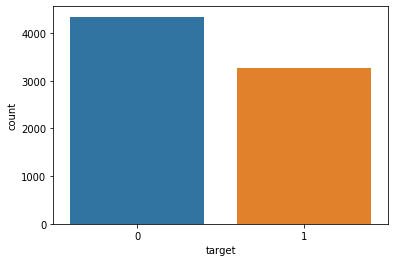

In [7]:
sns.countplot(dataset["target"])

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [64]:
dataset_text=dataset.drop(columns=["id","keyword","location"])

In [65]:
dataset_text

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


    - Remove HTML
    -Tokenization + Remove punctuation
    -Remove stop words
    -Lemmatization or Stemming

In [50]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [11]:
# punct = string.punctuation
# stopwords = nltk.corpus.stopwords.words()
# wl = nltk.WordNetLemmatizer()

In [12]:
# from string import string.punctuation

SyntaxError: invalid syntax (<ipython-input-12-8219effadba8>, line 1)

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdessamad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# def text_preprocessing(text):
#     text = text.lower()
#     punct = "".join([word for word in text if word not in string.punctuation)]
#     token=RegexpTokenizer("r\w+")
#     token_txt= [token.tokenize(i)  for i in text] 
#     stopw=[i for i in text if i not in stopwords.words("english")]
#     lemmat =WordNetLemmatizer()
#     lemmat_txt= [lemmat.lemmatize(i) for i in text]
#     stemm = PorterStemmer()
#     stemm_txt = " ".join([stemm.stem(i) for i in text])
#     return stemm_txt
    

In [66]:
def text_preprocessing(text):
    text = text.lower()
    text = "".join([word for word in text if word not in string.punctuation])
#     token=RegexpTokenizer(r"\w+")
#     text= [token.tokenize(i)  for i in text] 
#     text=[i for i in text if i not in stopwords.words("english")]
#     lemmat =WordNetLemmatizer()
#     text= [lemmat.lemmatize(i) for i in text]
#     stemm = PorterStemmer()
#     text = " ".join([stemm.stem(i) for i in text])

    return text
    

In [67]:
dataset_text["text_clean"]  = dataset_text['text'].apply(lambda x: text_preprocessing(x))

In [68]:
dataset_text.head()

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [69]:
token=RegexpTokenizer(r"\w+")
dataset_text["text_clean"] = dataset_text["text_clean"].apply(lambda x:token.tokenize(x))
    


In [70]:
dataset_text.head()

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala..."


In [71]:
def text_preprocessing2(text):
    text=[i for i in text if i not in stopwords.words("english")]
    lemmat =WordNetLemmatizer()
    text= [lemmat.lemmatize(i) for i in text]
    stemm = PorterStemmer()
    text = " ".join([stemm.stem(i) for i in text])
    return text

In [72]:
dataset_text["text_clean"]  = dataset_text['text_clean'].apply(lambda x: text_preprocessing2(x))

In [73]:
dataset_text.head()

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


In [81]:
# train, test = train_test_split(dataset_text, test_size=0.2,shuffle=True)

In [93]:
dataset_text.head()

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


In [77]:
import re
import nltk
import tqdm

In [78]:
tqdm.tqdm(nltk.download('punkt'))
punct = string.punctuation
stopwords = nltk.corpus.stopwords.words()
wl = nltk.WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abdessamad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0it [00:00, ?it/s]


In [79]:
#hyper parameter
vocab_size = 10000
embedding_dim = 16
max_len = 1000
trunc_type = "post"
oov_tok = "<OOV>"
training_size = 20000

In [94]:
#Tokenzing the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(dataset_text['text_clean'])
word_index = tokenizer.word_index

In [95]:

train_word_sequence = tokenizer.texts_to_sequences(dataset_text['text_clean'])
train_padd_sequence = pad_sequences(train_word_sequence, maxlen=max_len, truncating=trunc_type)



In [98]:
X_features_dataset = pd.DataFrame(train_padd_sequence)

In [99]:
X_features_dataset.shape

(7613, 1000)

In [100]:
X_features_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3837,475,220,94,1407,3027,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,147,4,198,509,5567,5568,1070
2,0,0,0,0,0,0,0,0,0,0,...,535,1902,395,5569,226,40,1902,395,348,435
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2508,14,2509,104,40,348,50
4,0,0,0,0,0,0,0,0,0,0,...,0,59,1071,151,3838,1541,211,104,2510,131


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_features_dataset, dataset_text['target'], test_size = 0.2,shuffle=True)

In [113]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len+2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1002, 16)          160000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 1002, 128)         41472     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 308,609
Trainable params: 308,609
Non-trainable params: 0
_________________________________________________________________


In [114]:

# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000,
    decay_rate=0.90,
    staircase=True)

In [116]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
              loss= tf.keras.losses.binary_crossentropy,
              metrics = [tf.keras.metrics.binary_accuracy])

In [118]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

Epoch 1/5
191/191 [==============================] - 327s 2s/step - loss: 0.6822 - binary_accuracy: 0.5703 - val_loss: 0.6742 - val_binary_accuracy: 0.5680
Epoch 2/5
191/191 [==============================] - 339s 2s/step - loss: 0.6171 - binary_accuracy: 0.6524 - val_loss: 0.5382 - val_binary_accuracy: 0.7630
Epoch 3/5
191/191 [==============================] - 347s 2s/step - loss: 0.4261 - binary_accuracy: 0.8190 - val_loss: 0.4963 - val_binary_accuracy: 0.7879
Epoch 4/5
191/191 [==============================] - 348s 2s/step - loss: 0.3585 - binary_accuracy: 0.8580 - val_loss: 0.5003 - val_binary_accuracy: 0.7853
Epoch 5/5
191/191 [==============================] - 349s 2s/step - loss: 0.3062 - binary_accuracy: 0.8856 - val_loss: 0.5106 - val_binary_accuracy: 0.7715
